#**TUGAS KELOMPOK 1 *EXPLORATORY DATA ANALYSIS* (EDA)**

\\
*Anggota kelompok:*
1.   Daniel Rivaldo Haryanto (2006534890)
2.   Muhammad Ammar Daffa (2006571066)
3.   Ruth Intan Davina (2006483246)
4.   Sachi Kirana Hera Singh (2006572926)
5.   Salsabilla (2006463856)

In [1]:
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
import numpy as np
from collections import Counter
import pandas as pd, matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('bmh'); sns.set()

In [2]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
price = pd.read_csv('data/price.csv')

--2021-04-14 05:38:56--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv’

price.csv           100%[===================>]  52.34K  --.-KB/s    in 0.007s  

2021-04-14 05:38:57 (7.35 MB/s) - ‘data/price.csv’ saved [53592/53592]



###**Tugas 1:**
**Keluarkan *outlier* atasnya.**

In [3]:
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


In [4]:
HousePrice = price2["House_Price"]


Q1 = HousePrice.quantile(0.25)
Q3 = HousePrice.quantile(0.75)
IQR = Q3 - Q1

print("Q1 = " + str(Q1))
print("\nQ3 = " + str(Q3))
print("\nIQR = " + str(IQR))


UpperOutlier = HousePrice > Q3 + 1.5*IQR

print("\nOutlier atasnya terletak pada data di bawah ini.")
price2.loc[UpperOutlier].head()

Q1 = 4658000.0

Q3 = 7180500.0

IQR = 2522500.0

Outlier atasnya terletak pada data di bawah ini.


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


###**Tugas 2:**
**Bagaimana mengeluarkan semua *outlier* bawah di *Box Plot* di atas?**
*   Petunjuk: "Slice" terlebih dahulu datanya.


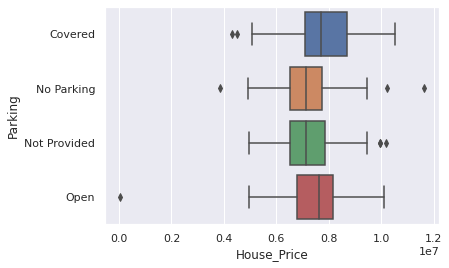

In [5]:
cata = price2[price2.City_Category == "CAT A"]
p = sns.boxplot(x = "House_Price", y = "Parking", data = cata)

In [6]:
cata_covered = cata[cata.Parking == "Covered"]
cata_np = cata[cata.Parking == "No Parking"]
cata_open = cata[cata.Parking == "Open"]

Q1ac = cata_covered["House_Price"].quantile(0.25)
Q3ac = cata_covered["House_Price"].quantile(0.75)
IQRac = Q3ac - Q1ac
outliers_bawahac = (cata_covered["House_Price"] < (Q1ac - 1.5*IQRac))

Q1anp = cata_np["House_Price"].quantile(0.25)
Q3anp = cata_np["House_Price"].quantile(0.75)
IQRanp = Q3anp - Q1anp
outliers_bawahanp = (cata_np["House_Price"] < (Q1anp - 1.5*IQRanp))

Q1ao = cata_open["House_Price"].quantile(0.25)
Q3ao = cata_open["House_Price"].quantile(0.75)
IQRao = Q3ao - Q1ao
outliers_bawahao = (cata_open["House_Price"] < (Q1ao - 1.5*IQRao))

In [7]:
cata_covered.loc[outliers_bawahac].head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
320,11240.0,9781.0,15232.0,1523.0,1813.0,Covered,CAT A,520,4496000
875,9997.0,12349.0,13043.0,1350.0,1606.0,Covered,CAT A,770,4303000


In [8]:
cata_np.loc[outliers_bawahanp].head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
409,8773.0,13547.0,15551.0,1509.0,1799.0,No Parking,CAT A,960,3860000


In [9]:
cata_open.loc[outliers_bawahao].head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


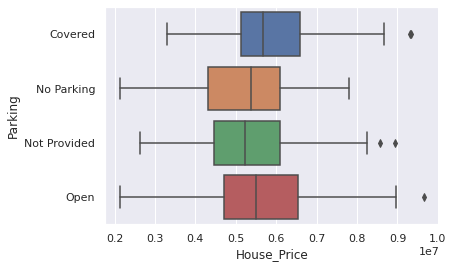

In [10]:
catb = price2[price2.City_Category == "CAT B"]
p = sns.boxplot(x = "House_Price", y = "Parking", data = catb)

Dari *Box Plot* di atas, tidak ada *outlier* di kategori B.

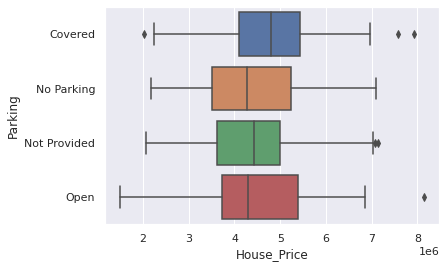

In [11]:
catc = price2[price2.City_Category == "CAT C"]
p = sns.boxplot(x = "House_Price", y = "Parking", data = catc)

In [12]:
catc_covered = catc[catc.Parking == "Covered"]
Q1cc = catc_covered["House_Price"].quantile(0.25)
Q3cc = catc_covered["House_Price"].quantile(0.75)
IQRcc = Q3cc - Q1cc
outliers_bawahcc = (catc_covered["House_Price"] < (Q1cc - 1.5*IQRcc))
catc_covered.loc[outliers_bawahcc].head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
622,4619.0,10768.0,11787.0,1624.0,1946.0,Covered,CAT C,870,2027000


###**Tugas 3:**
**Jawablah pertanyaan-pertanyaan berikut.**

In [13]:
# Loading Contoh Data studi kasus pertama di atas
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### 1. **Adakah tipe variabel yang kurang tepat di data tersebut?**

In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Kesimpulan: Tipe data sudah tepat.

#####2. **Apakah data numeriknya cenderung berdistribusi normal?**

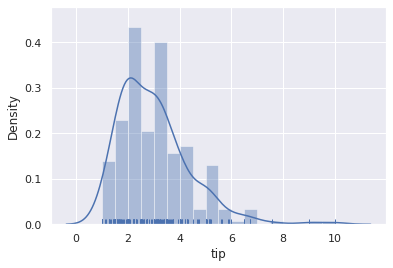

In [15]:
p = sns.distplot(tips['tip'], kde=True, rug=True)

Kesimpulan: Data numeriknya tidak berdistribusi normal.

#####3. **Apakah ada *outlier*, *noise*, *missing values*, dan/atau duplikasi data?**

######a) Mengecek apakah ada *outlier*

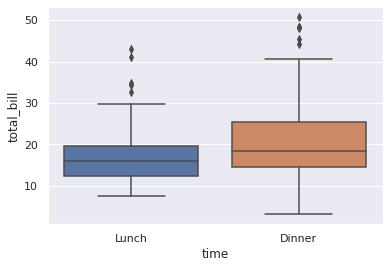

In [16]:
p = sns.boxplot(x="time", y="total_bill", data=tips)

Kesimpulan: Dilihat dari hasil visualisasi dengan *boxplot*, terdapat beberapa *outlier*.

######b) Mengecek apakah ada *noise*.

Kesimpulan: Tidak terdapat *noise* pada data.

######c) Mengecek apakah ada *missing value*.

In [17]:
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Kesimpulan: Tidak terdapat *missing values*.


######d) Mengecek apakah ada duplikasi data.

In [18]:
tips.duplicated().sum()

1

Kesimpulan: Terdapat duplikasi data.

#####4. **Apakah pelanggan pria dan wanita cenderung proporsional (*balance*)?**

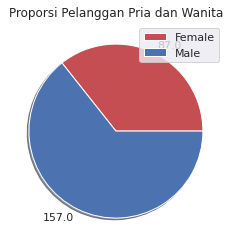

In [19]:
data = tips['sex']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'b']
labels = proporsion.keys()
explode = (0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Pelanggan Pria dan Wanita')
plt.legend(labels,loc='best')
plt.show()

#####5. **Dari data yang ada, apakah pria atau wanita ada kecenderungan memberi tips lebih besar?**

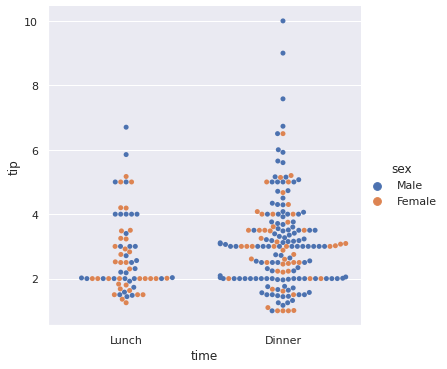

In [20]:
sns.catplot(x="time", y="tip", hue="sex", kind="swarm", data=tips)

Berdasarkan *swarm plot* di atas, terlihat bahwa tidak ada kecenderuan perbedaan signifikan jumlah tips antara pria dan wanita.

#####6. **Dari data yang ada, apakah ada kecenderungan tips lebih besar di hari-hari tertentu?**

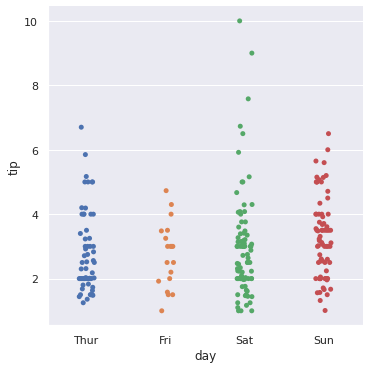

In [21]:
sns.catplot(x = "day", y = "tip", data = tips)

Berdasarkan plot di atas, terlihat bahwa pada hari Jumat, jumlah tips yang diberikan lebih sedikit dibandingkan dengan hari lain.

#####7. **Dari data yang ada, apakah *customer* perokok cenderung memberi tips lebih besar?**

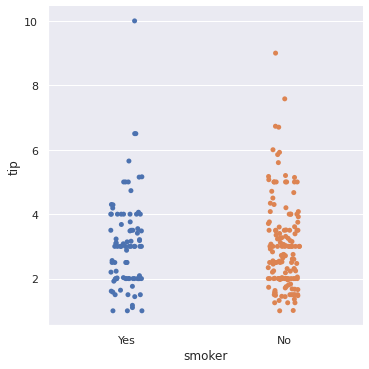

In [22]:
sns.catplot(x = "smoker", y = "tip", data = tips)

Pada plot di atas, terlihat bahwa tidak ada perbedaan yang signifikan pada pemberian tips antara *customer* perokok dan *customer* yang tidak merokok.

##### 8. **Apakah pola di nomer 5 dan 7 dipengaruhi hari?**

Berdasarkan plot pada nomor 5 dan 7, hari tidak mempengaruhi kecenderungan pelanggan untuk memberi tips yang lebih besar.

##### 9. **Pola apalagi yang dapat Anda temukan? (Misal, bisakah Anda menyarankan tata letak kursi/meja restoran dari data ini?)**

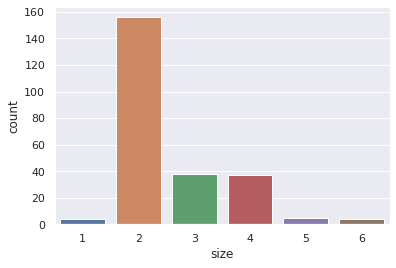

In [23]:
sns.countplot(x="size", data=tips)

Dari plot diatas, dapat dikatakan bahwa restoran cenderung menerima pelanggan yang berpasangan dibanding berkelompok ataupun sendiri. Oleh karena itu, kami akan menyarankan restoran untuk memperbanyak tatanan kursi dan meja dalam bentuk berpasangan.

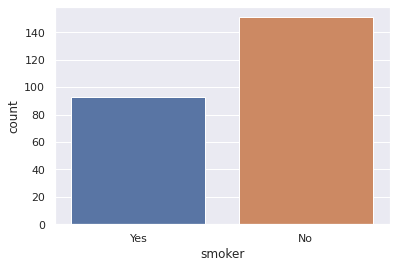

In [24]:
sns.countplot(x="smoker", data=tips)

Dari plot diatas, dapat dilihat bahwa cenderung lebih banyak pelanggan yang tidak merokok dibanding dengan yang merokok. Maka, kami akan menyarankan restoran untuk menyediakan lebih banyak tempat di dalam ruangan dibanding tempat *smoking area*.

##### 10. **Dari hasil EDA Anda, saran apa saja yang akan Anda berikan ke pemilik restoran?**

Berdasarkan data yang sudah didapat, saran yang akan kami berikan adalah memperbanyak pegawai wanita karena terlihat bahwa jumlah pelanggan pria lebih banyak dibanding wanita. Selain itu, juga memperbanyak pegawai khususnya pada akhir pekan karena terlihat lebih padat dari hari Kamis dan Jumat. Kemudian, kami akan menyarankan restoran untuk membuat tata letak kursi dan meja lebih banyak dalam bentuk berpasangan. Kami juga akan menyarankan untuk memperbanyak tempat duduk di dalam ruangan karena cenderung lebih banyak pelanggan yang tidak merokok.